Suicide Attempt Prediction Using SVM, KNN, and Random Forest Classifiers

Dataset Source: Kaggle

Link: https://www.kaggle.com/datasets/kingburrito666/the-demographic-rforeveralone-dataset?resource=download

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
uploaded = files.upload()
df = pd.read_csv('foreveralone.csv')
df.head()

Saving foreveralone.csv to foreveralone.csv


,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,NaN
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",NaN


In [ ]:
# Initial inspection
print("Initial shape:", df.shape)
print("Missing values per column:\n", df.isnull().sum())

Initial shape: (469, 19)
Missing values per column:
 time                       0
gender                     0
sexuallity                 0
age                        0
income                     0
race                       0
bodyweight                 0
virgin                     0
prostitution_legal         0
pay_for_sex                0
friends                    0
social_fear                0
depressed                  0
what_help_from_others      0
attempt_suicide            0
employment                 0
job_title                 24
edu_level                  0
improve_yourself_how     106
dtype: int64


In [ ]:
# Drop irrelevant or high-missing-value columns
columns_to_drop = ['job_title', 'improve_yourself_how', 'race', 'what_help_from_others', 'time', 'income','pay_for_sex']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

In [ ]:
# Fill missing values
binary_columns = ['virgin', 'prostitution_legal', 'pay_for_sex', 'social_fear', 'depressed', 'attempt_suicide']
for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        df[col] = df[col].map({'Yes': 1, 'No': 0})

In [ ]:
# Categorical columns to encode
columns_to_encode = ['bodyweight', 'gender', 'sexuallity']
existing_columns = [col for col in columns_to_encode if col in df.columns]

In [ ]:
# apply one-hot encoding

df = pd.get_dummies(df, columns=existing_columns, drop_first=True)

In [ ]:
# Map educational levels
if 'edu_level' in df.columns:
    edu_mapping = {
        'Some college, no degree': 0,
        'High school graduate, diploma or the equivalent (for example: GED)': 0,
        'Some high school, no diploma': 0,
        'Trade/technical/vocational training': 0,
        'Bachelor’s degree': 1,
        'Master’s degree': 1,
        'Associate degree': 1,
        'Professional degree': 1,
        'Doctorate degree': 1
    }
    df['edu_level'] = df['edu_level'].map(edu_mapping)

# Map employment status
if 'employment' in df.columns:
    employment_mapping = {
        'A Student': 1,
        'Employed for wages': 1,
        'Self-employed': 1,
        'Out of work but not currently looking for work': 0,
        'Out of work and looking for work': 0,
        'Unable to work': 0,
        'Military': 0,
        'Retired': 0,
        'A homemaker': 0
    }
    df['employment'] = df['employment'].map(employment_mapping)

In [ ]:
# Feature scaling
scaler = MinMaxScaler()
columns_to_scale = [col for col in ['age', 'friends'] if col in df.columns]
if columns_to_scale:
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Final dataset info
print("\nFinal Preprocessed Dataset:")
print(df.head())
print("\nShape of dataset:", df.shape)


Final Preprocessed Dataset:
        age  virgin  prostitution_legal   friends  social_fear  depressed  \
0  0.396552       1                   0  0.000000            1          1   
1  0.155172       1                   0  0.000000            1          1   
2  0.172414       1                   0  0.016667            1          1   
3  0.120690       1                   1  0.013333            1          1   
4  0.189655       0                   0  0.016667            0          1   

   attempt_suicide  employment  edu_level  bodyweight_Obese  \
0                1         1.0          1             False   
1                0         0.0          0             False   
2                0         0.0          0             False   
3                0         NaN          0             False   
4                0         1.0          0             False   

   bodyweight_Overweight  bodyweight_Underweight  gender_Male  \
0                  False                   False         True   

In [ ]:
# Dataset splitting
X = df.drop('attempt_suicide', axis=1)
y = df['attempt_suicide']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

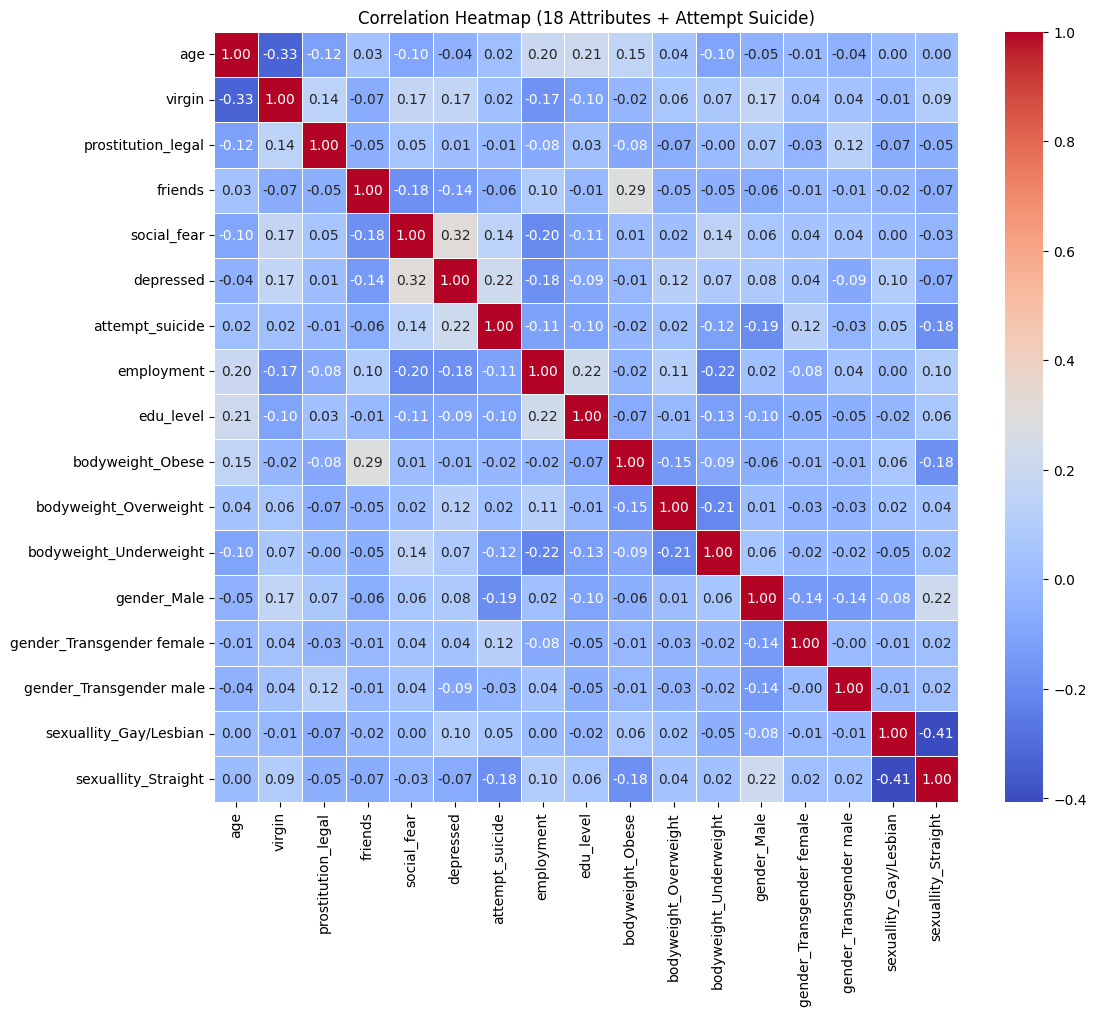

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = df.columns[:18].tolist()
if 'attempt_suicide' not in selected_columns:
    selected_columns.append('attempt_suicide')

df_selected = df[selected_columns].copy()

df_selected = df_selected.dropna()

corr_matrix = df_selected.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (18 Attributes + Attempt Suicide)')
plt.show()


Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight='balanced')
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("SVM Evaluation (Balanced)")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred, zero_division=0))

SVM Evaluation (Balanced)
Accuracy: 0.6099290780141844
Confusion Matrix:
 [[73 42]
 [13 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.63      0.73       115
           1       0.24      0.50      0.32        26

    accuracy                           0.61       141
   macro avg       0.54      0.57      0.52       141
weighted avg       0.74      0.61      0.65       141



KNN

In [ ]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print("KNN Evaluation (Original Data)")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred, zero_division=0))

KNN Evaluation (Original Data)
Accuracy: 0.7659574468085106
Confusion Matrix:
 [[106   9]
 [ 24   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       115
           1       0.18      0.08      0.11        26

    accuracy                           0.77       141
   macro avg       0.50      0.50      0.49       141
weighted avg       0.70      0.77      0.73       141



**Random Forest**

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred, zero_division=0))

Random Forest Evaluation
Accuracy: 0.7588652482269503
Confusion Matrix:
 [[105  10]
 [ 24   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       115
           1       0.17      0.08      0.11        26

    accuracy                           0.76       141
   macro avg       0.49      0.49      0.48       141
weighted avg       0.69      0.76      0.72       141



Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, roc_auc_score, precision_recall_curve
)

<ipython-input-46-dcef30986448>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["SVM", "KNN", "Random Forest"], y=[svm_acc, knn_acc, rf_acc], palette="pastel")


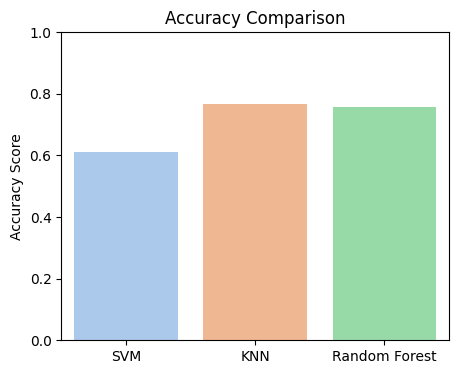

In [ ]:
# Accuracy Comparison
svm_acc = accuracy_score(y_test, svm_pred)
knn_acc = accuracy_score(y_test, knn_pred)
rf_acc = accuracy_score(y_test, rf_pred)

# Plot Accuracy Comparison
plt.figure(figsize=(5, 4))
sns.barplot(x=["SVM", "KNN", "Random Forest"], y=[svm_acc, knn_acc, rf_acc], palette="pastel")
# sns.barplot(x=["SVM", "KNN"], y=[svm_acc, knn_acc], palette="pastel")
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.show()


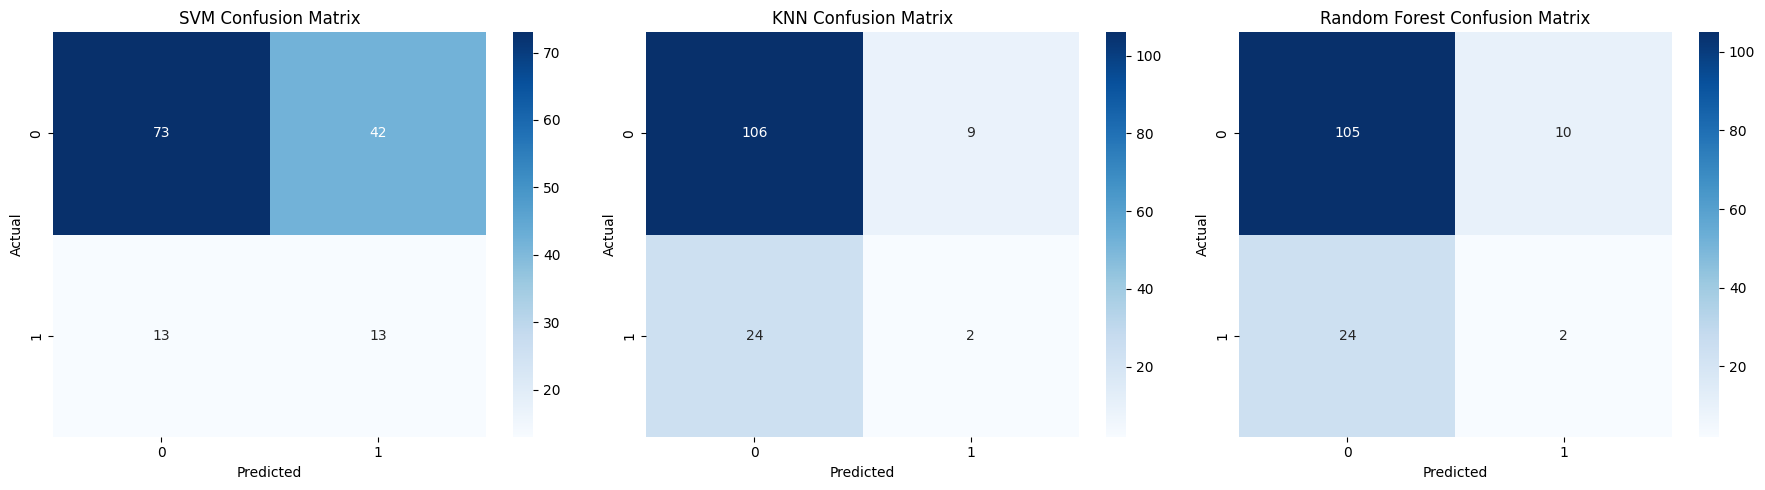

In [ ]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, pred, name in zip(axes, [svm_pred, knn_pred, rf_pred], ["SVM", "KNN", "Random Forest"]):
#for ax, pred, name in zip(axes, [svm_pred, knn_pred], ["SVM", "KNN"]):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
# Classification
print("Classification Report - SVM:\n", classification_report(y_test, svm_pred, zero_division=0))
print("Classification Report - KNN:\n", classification_report(y_test, knn_pred, zero_division=0))
print("Classification Report - Random Forest:\n", classification_report(y_test, rf_pred, zero_division=0))

Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.85      0.63      0.73       115
           1       0.24      0.50      0.32        26

    accuracy                           0.61       141
   macro avg       0.54      0.57      0.52       141
weighted avg       0.74      0.61      0.65       141

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       115
           1       0.18      0.08      0.11        26

    accuracy                           0.77       141
   macro avg       0.50      0.50      0.49       141
weighted avg       0.70      0.77      0.73       141

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       115
           1       0.17      0.08      0.11        26

    accuracy                           0.76       141
   macro avg       0.49     

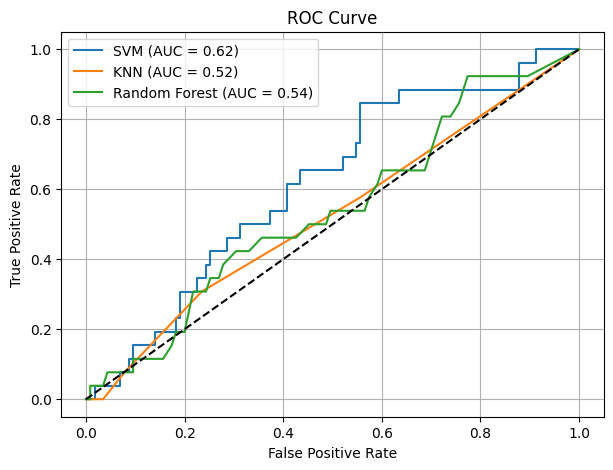

In [ ]:
# ROC Curves
svm_probs = svm_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

auc_svm = roc_auc_score(y_test, svm_probs)
auc_knn = roc_auc_score(y_test, knn_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

# Plot ROC Curves
plt.figure(figsize=(7, 5))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

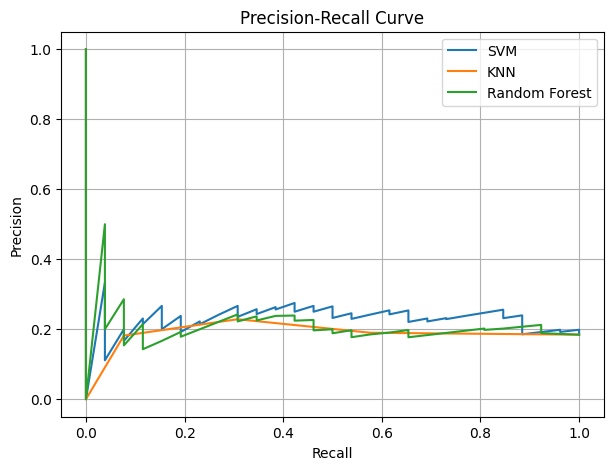

In [ ]:
# Precision-Recall Curves
prec_svm, rec_svm, _ = precision_recall_curve(y_test, svm_probs)
prec_knn, rec_knn, _ = precision_recall_curve(y_test, knn_probs)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, rf_probs)

# Plot Precision-Recall Curves
plt.figure(figsize=(7, 5))
plt.plot(rec_svm, prec_svm, label="SVM")
plt.plot(rec_knn, prec_knn, label="KNN")
plt.plot(rec_rf, prec_rf, label="Random Forest")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()
